In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import euclidean as euc
import matplotlib.patches as patches
from skimage import transform as tf
from skimage.transform import ProjectiveTransform
%matplotlib inline



__Question 1__ Attached is an image um_000038.png recorded with a camera mounted on a car. The focal
length of the camera is 721.5, and the principal point is (609.6; 172.9). We know that the camera
was attached to the car at a distance of 1.7 meters above ground.

In [3]:
img = cv2.imread('um_000038.png', 1)[:,:,::-1] # Converting BGR to RGB

In [ ]:
plt.imshow(img)

In [6]:
focal_length = 721.5
p_x = 609.6
p_y = 172.9
height = 1.7

__a)__ Write the internal camera parameter matrix K. 

In [9]:
K = np.array([[focal_length, 0, p_x], [0, focal_length, p_y],[0,0,1]])

In [10]:
K

array([[721.5,   0. , 609.6],
       [  0. , 721.5, 172.9],
       [  0. ,   0. ,   1. ]])

__b)__ Write the equation of the ground plane in camera's coordinate system. You can
assume that the camera's image plane is orthogonal to the ground.

__Question 2__ Your goal is to create a simple system that analyzes the road ahead
of the driving car. Include your code to your solution document.

Get the first 3 names of the images as stated in the assignment

In [80]:
img1, img2, img3 = np.loadtxt('data/test/test.txt',dtype=str)[:3]

Get the camera parameters from the data and transform them into the floats  

In [52]:
def get_camera_parameters(img_name):
    
    param = np.loadtxt('data/test/calib/'+img_name+'_allcalib.txt', dtype=str)
    f, px, py, baseline = float(param[0][1]), float(param[1][1]), float(param[2][1]), float(param[3][1])
    return f, px, py, baseline

Get the image with the estimated disparity given by the dataset 

In [81]:
def get_disparity(img_name):
     
    disparity = cv2.imread('data/test/results/'+img_name+'_left_disparity.png', 0)
    return disparity

Compute the depth of the image

In [77]:
def get_depth(img_name):
    
    f, px, py, baseline = get_camera_parameters(img_name)
    
    disparity = get_disparity(img_name)
    
    # Change all zeros to ones to avoid the division by zero
    disparity = np.where(disparity==0.0, 1.0, disparity) 
    
    # Compute the depth by the formula 
    depth = (f*baseline)/ disparity 
    
    # Since we changed zeros to one, we should replace these values by the maximum depth
    depth = np.where(depth==f*baseline, np.max(depth), depth)
    
    return depth
    

Visualize the results for 3 images

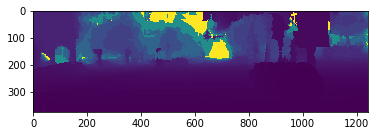

In [83]:
plt.imshow(get_depth(img1))
plt.show()

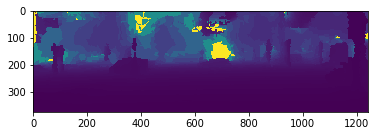

In [85]:
plt.imshow(get_depth(img2))
plt.show()

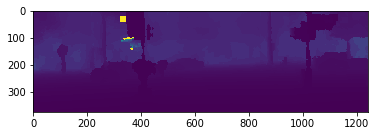

In [84]:
plt.imshow(get_depth(img3))
plt.show()